In [1]:
# import settings and functions
%run ./../../imports.ipynb


Imports finished! :D


## What mesh?

Copy your choice to the next cell

for SquareTop:
```
analytical_solution_tag = "-ana_square_top"
generate_config = generateConfig_squareTop
generate_mesh = generateMesh_squareTop
```

for SquareSinCos:
```
analytical_solution_tag = "-ana_square_sincos"
generate_config = generateConfig_squareSinCos
generate_mesh = generateMesh_squareSinCos
```

In [2]:
# Change according to instruction above
analytical_solution_tag = "-ana_mexi_hat"
generate_config = generateConfig_squareMexiHat
generate_mesh = generateMesh_squareMexiHat

# analytical_solution_tag = "-ana_square_top"
# generate_config = generateConfig_squareTop
# generate_mesh = generateMesh_squareTop

# analytical_solution_tag = "-ana_square_sincos"
# generate_config = generateConfig_squareSinCos
# generate_mesh = generateMesh_squareSinCos

## Analysis setup

In [3]:
prefix = "c5_hat_missing_"
# prefix = "c5_top_missing_"

# which executable?

exe = hdiv_data_driven_diffusion_snes
sumanalys = "sumanalys.csv"
ana_name = "ana_square_mexi_mixed_order"

ana_compare_exe = [hdiv_data_driven_diffusion_snes, hdiv_diffusion, classic_diffusion, data_driven_diffusion_snes]
ana_compare_name = ["ana_square_mexi_dd_weak", "ana_square_mexi_mixed", "ana_square_mexi_classic", "ana_square_mexi_dd"]
# ana_compare_name = ["ana_square_mexi_mixed"]
ana_compare_sum = ["sumanalys.csv", "sumanalys.csv", "FEM_errors.csv", "sumanalys.csv"]

# monte
monte_name_list = ["sumanalys_monte_ord_ref", "sumanalys_monte_00", "sumanalys_monte_11", "sumanalys_monte_DD_hp", "sumanalys_monte_DD_orde"]
# monte_name_list = ["sumanalys_monte_ord_ref", "sumanalys_monte_00", "sumanalys_monte_11"]
monte_ref_list = ["-refinement_style 1 -ref_iter_num 4 -ref_control 1", 
                  "-refinement_style 0", 
                  "-refinement_style 0", 
                  "-refinement_style 3 -ref_iter_num 4 -ref_control 1 -tol_distance_ref 4.0 -tol_distance_var_ref 0.5 -refine_h_boundary_only -tol_distance_var_ave 0.5",
                  "-refinement_style 1 -ref_iter_num 4 -ref_control 1 -tol_distance_ref 4.0 -tol_distance_var_ref 0.5 -refine_h_boundary_only -tol_distance_var_ave 0.5"]

                #   "-tol_distance_ref 4.0 -tol_distance_var_ref 0.5 -refine_h_boundary_only -tol_distance_var_ave 0.5"
monte_ele_list = [0,0,1,0, 0]

# Convergence analysis parameters
order_list = [1, 2, 3] # approximation order p
elem_size_list = [0.08, 0.04, 0.02] # element size h
# elem_size_list = [0.1, 0.05, 0.025] # element size h
# order_list = [2, 3] # approximation order p
# elem_size_list = [1./3., 1./7., 1./13.] # element size h
params.triangle_mesh = True
params.nproc = 1 # number of processors
jumps = ""
if params.nproc == 1:
    jumps = "-get_jumps"
# jumps = "-get_jumps"

use_line = "-use_line"
use_line = ""

run_test = True
run_analysis = True
run_refinement_analysis = True
run_refinement_mesh_analysis = True
run_refinement_hp_analysis = True
run_refinement_analysis_DD_order = True
run_refinement_DD_hp_analysis = True
run_monte = True

# params.triangle_mesh = False

# run_test = False
run_analysis = False
run_refinement_analysis = False
run_refinement_mesh_analysis = False
run_refinement_hp_analysis = False
run_refinement_analysis_DD_order = False
run_refinement_DD_hp_analysis = False
run_monte = False

naming = ["order", "gaussnum", "iterations","volume", "datanum","rmsPoiErr", "errorEstimator",
          "L2norm", "H1seminorm","fluxErr", "orderRefinementCounter", "errorIndicatorGrad", "errorIndicatorDiv", "jumpL2", "jumpHdiv", "eleNum"]
# naming = ["order", "gaussnum", "iterations","volume", "datanum","rmsPoiErr", "errorEstimator",
#           "L2norm", "H1seminorm","fluxErr", "orderRefinementCounter"]

error_name_list = ["L2norm", "H1seminorm", "fluxErr"]
error_label_list = [(r'Global error $L^2$-norm'),
               (r'Global error $H^1$-seminorm'), (r'Global Flux error')]

In [4]:
# # recreate dataset
# recreate_dataset = False

# dummy_count = 10000

# if recreate_dataset:
#     !{create_csv_dataset} -output_file dummy_tree.csv -my_dummy_noise_q 0 -my_dummy_noise_k 0 -my_dummy_k -1 -my_dummy_range_dp 9.0 -my_dummy_count {int(dummy_count)}

#     scal = np.genfromtxt('./scaling.in')
#     scaling = scal
#     print(scaling)
#     scaling[0] *= -1.
#     f = open("scaling.in", "w")
#     f.write(str(scaling[0])+"\n")
#     f.write(str(scaling[1]))
#     f.close()
#     print(scaling)

In [5]:
params.conductivity = 1.0 # linear conductivity
# params.element_size = elem_size_list[0] # element size in the regular mesh
params.element_size = 0.1
params.order = 1 # approximation order for displacements

# params.triangle_mesh = False # use triangular mesh

# Pre-processing parameters
params.mesh_file = "square_mexi"
params.length_x = 1
params.length_y = 1
params.length_z = 0
params.show_mesh = True


# solution parameters
params.log_file = "log" # log file name 


## Run test

In [6]:
# start display for showing results
display = Display(backend="xvfb", visible=False, size=(1024, 768))
display.start()

In [7]:
# # Testing mesh generation
# if run_test:
#     params.show_mesh = True
#     generate_config(params)
#     generate_mesh(params)

rm: cannot remove 'sumanalys_monte.csv': No such file or directory
Read "square_mexi.h5m"
Wrote "square_mexi.vtk"


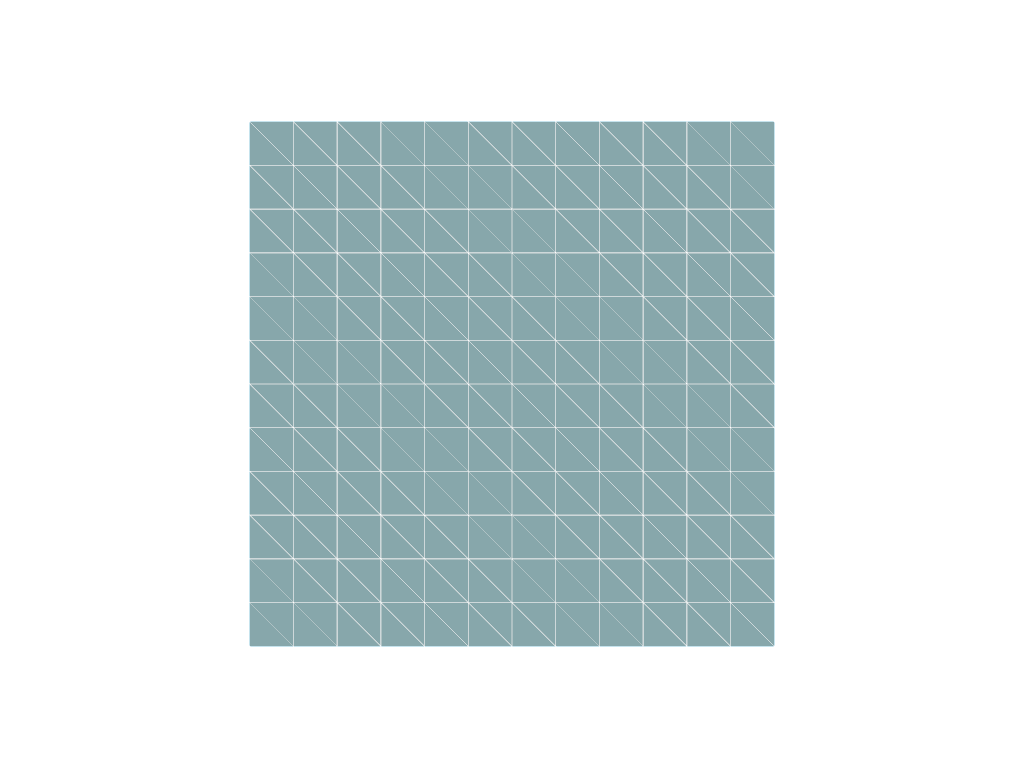

[0] <inform> MoFEM version 0.14.0 (MOAB 5.5.0 Petsc Release Version 3.16.6, Mar 30, 2022 )
[0] <inform> git commit id c8dfd486983b6cce1ab0f77eedb54e0da63082db
[0] <inform> Local time: 2024-11-23 23:44:42
[0] <inform> UTC time: 2024-11-23 23:44:42
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316737 type BLOCKSET UNKNOWNNAME msId 1 name untitled
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 2 name FLUX_UNIFORM                   
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316739 type BLOCKSET UNKNOWNNAME msId 3 name PRESSURE_UNIFORM               
[0] <inform> [MeshsetMng] meshset in database meshset 12682136550675316740 type BLOCKSET UNKNOWNNAME msId 4 name SOURCE_MEXI                    
[0] <inform> [mofem_part] meshset 12682136550675316737 type BLOCKSET UNKNOWNNAME msId 1 name untitled
[0] <inform> [mofem_part] meshset 12682136550675316738 type BLOCKSET UNKNOWNNAME msId 2 name F

In [13]:
# Testing running analysis
if run_test:
    !rm sumanalys_monte.csv
    # !rm out*
    # params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    # !{mofem_part} -my_file {params.mesh_file + ".h5m"} -nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    # !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} {jumps} {use_line} -use_part_star 0

    refinement_style = 3
    ref_iter_num = 6
    ref_control = 1.0
    params.nproc = 1

    # tolerance for distance for order ref
    tol_dist = "-tol_distance_ref 4.0 -tol_distance_var_ref 2.0 -refine_h_boundary_only -tol_distance_var_ave 1.0" 
    # tol_dist = ""
    tol_dist = monte_ref_list[3]
    tol_dist = ""
    tol_dist = "-tol_distance_ref 1.0 -tol_distance_var_ref 2 -refine_h_boundary_only -tol_distance_var_ave 0.5" 

    print_integ = "-print_integ"

    monte = "-monte_carlo 30"
    monte = ""

    # refinement_style = 0

    # if run_refinement_analysis:    
    !rm {sumanalys}
    !rm ./out_*
    elem_size =  elem_size_list[0]
    params.element_size = elem_size
    params.show_mesh = True
    generate_mesh(params)
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    order = order_list[0]
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line} {print_integ} {tol_dist} {monte} 

    !mv sumanalys_monte.csv {monte_name}.csv
    
    !convert.py out*

# -print_integ
    # !convert.py out*


In [14]:
name_vtk_integ = prefix+"out_integ_pts_"
name_vtk_result = prefix+"out_result_"
name_vtk_error = prefix+"out_error_"
name_vtk_moab = prefix+"out_moab_"

In [15]:
if run_test:    
    out_to_vtk = !ls -c1 out_integ_pts_*.h5m
    last_file=out_to_vtk[0]
    !mbconvert {last_file} {name_vtk_integ}.vtk

    out_to_vtk = !ls -c1 out_result*.h5m
    last_file=out_to_vtk[0]
    !mbconvert {last_file} {name_vtk_result}.vtk

    out_to_vtk = !ls -c1 out_error*.h5m
    last_file=out_to_vtk[0]
    !mbconvert {last_file} {name_vtk_error}.vtk
    # !mbconvert out_moab_5.h5m {name_vtk_moab}.vtk
    !rm out_*h5m

Read "out_integ_pts_17.h5m"
Wrote "c5_hat_missing_out_integ_pts_.vtk"
Read "out_result_0.h5m"
Wrote "c5_hat_missing_out_result_.vtk"
Read "out_error_6.h5m"
Wrote "c5_hat_missing_out_error_.vtk"


ERROR_ESTIMATOR
Current resolution: [1024, 768]


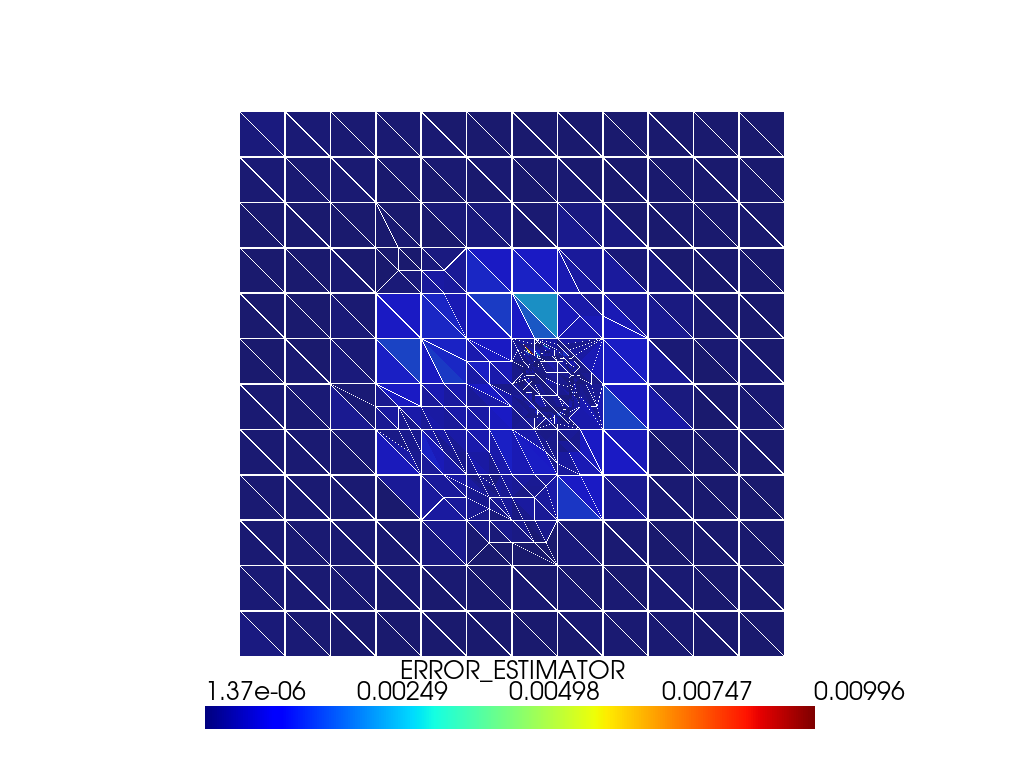

ERROR_INDICATOR_DIV
Current resolution: [1024, 768]


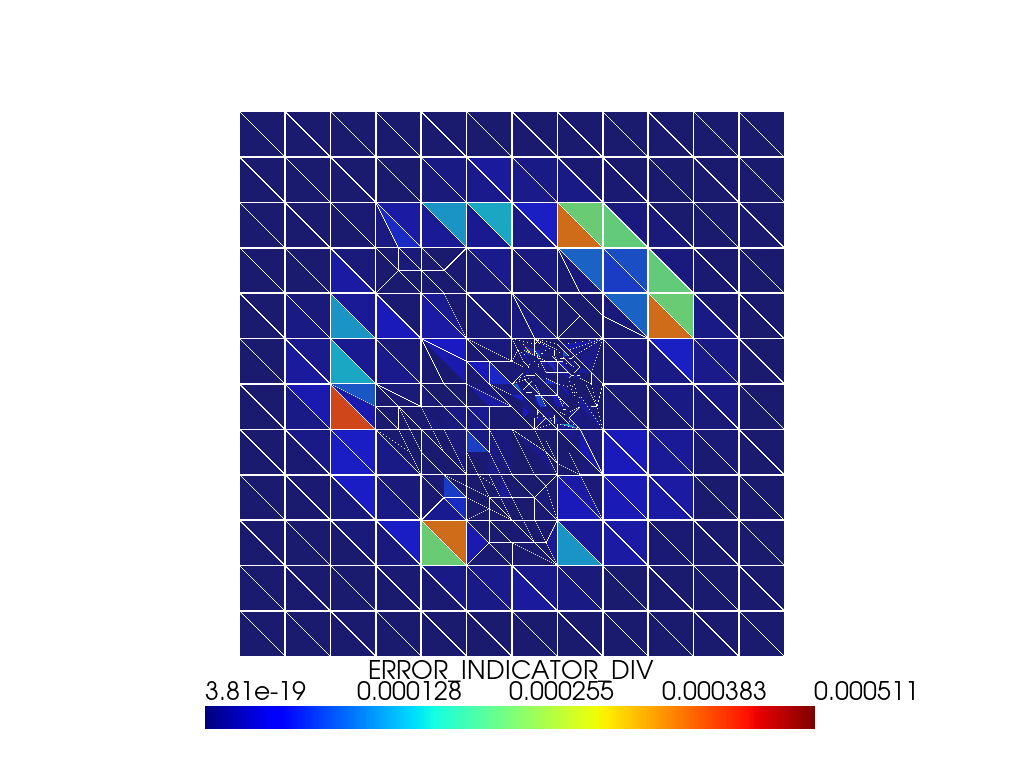

ERROR_INDICATOR_GRAD
Current resolution: [1024, 768]


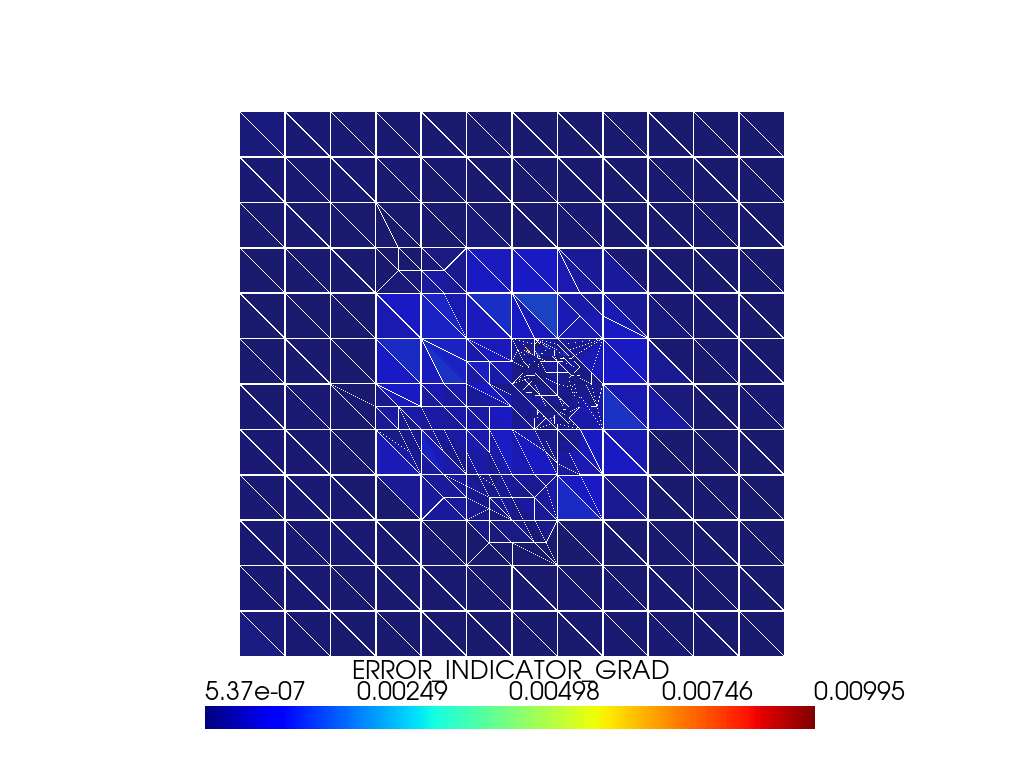

JUMP_L2
Current resolution: [1024, 768]


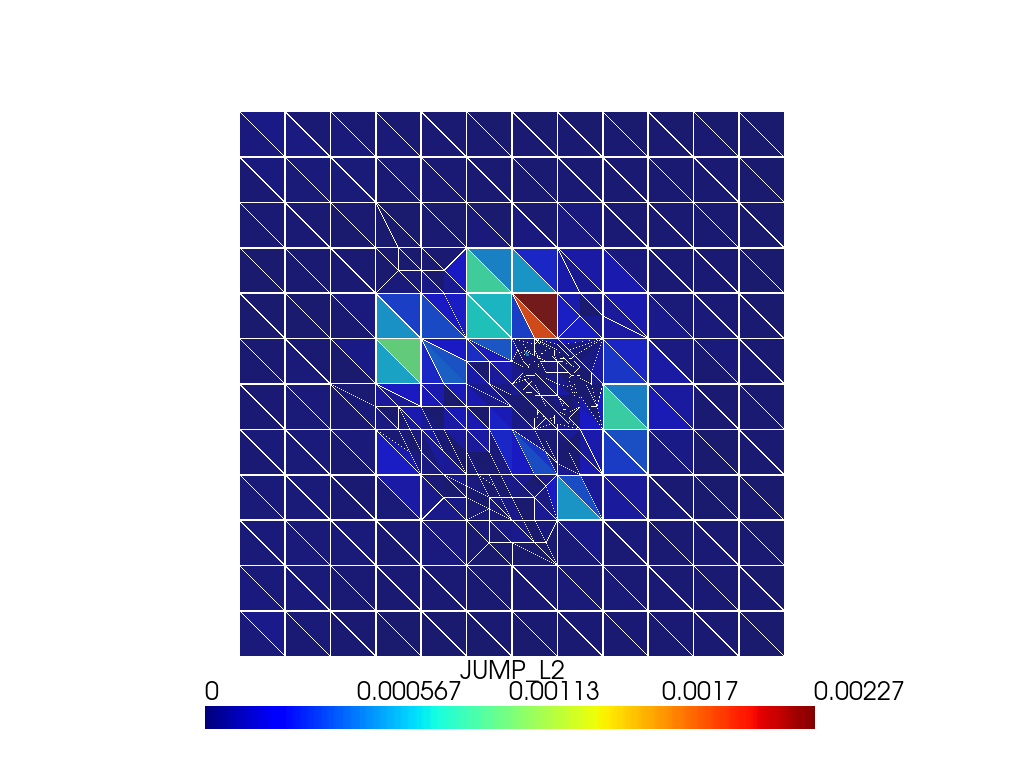

JUMP_L2
Current resolution: [1024, 768]


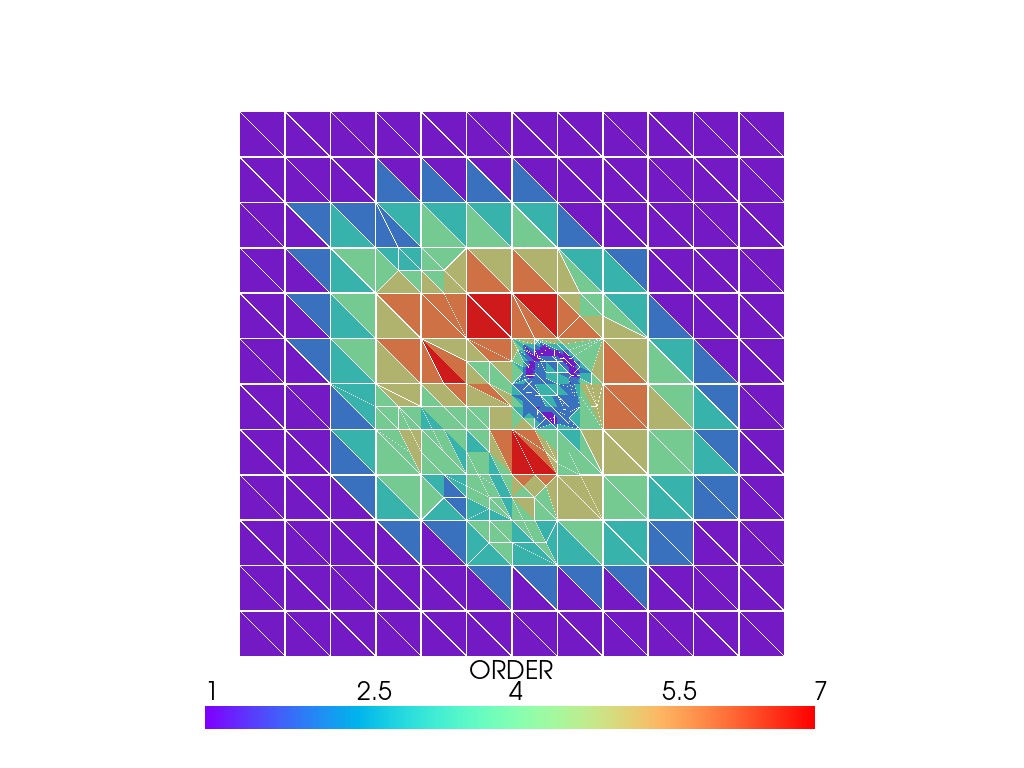

In [16]:
# import settings and functions
color_lims = False
%run ./../NL_data_tests/plot_for_hdiv_errors.ipynb

plotting results for Temperature
Current resolution: [1024, 768]


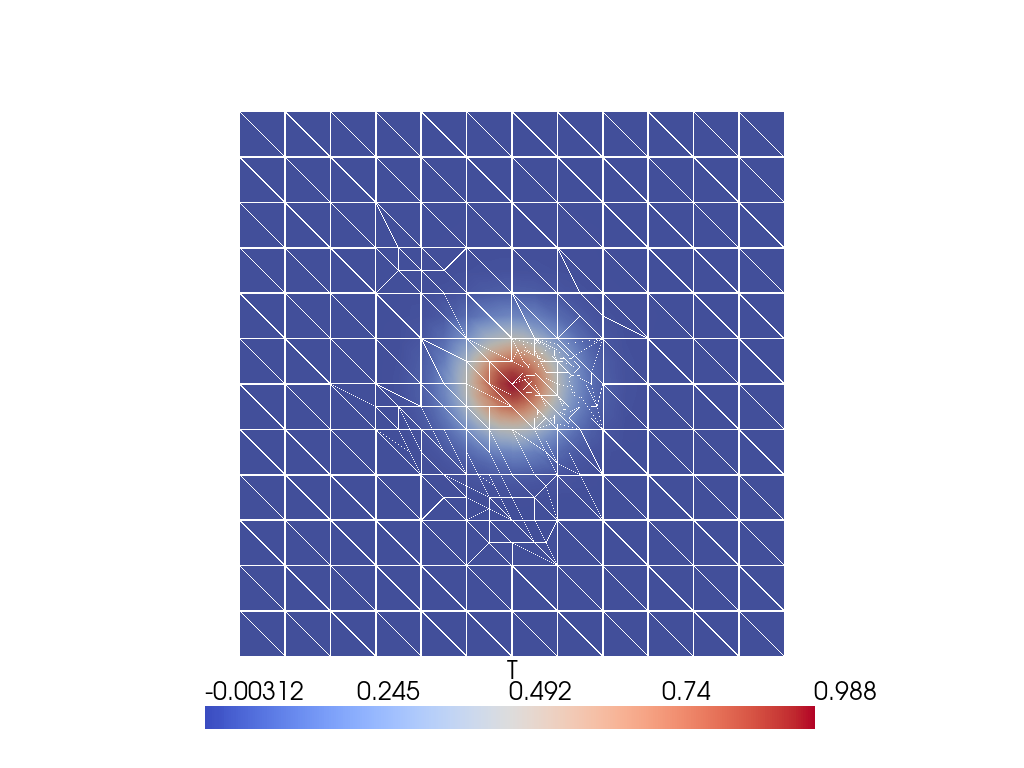

plotting results for grad(T)
Current resolution: [1024, 768]


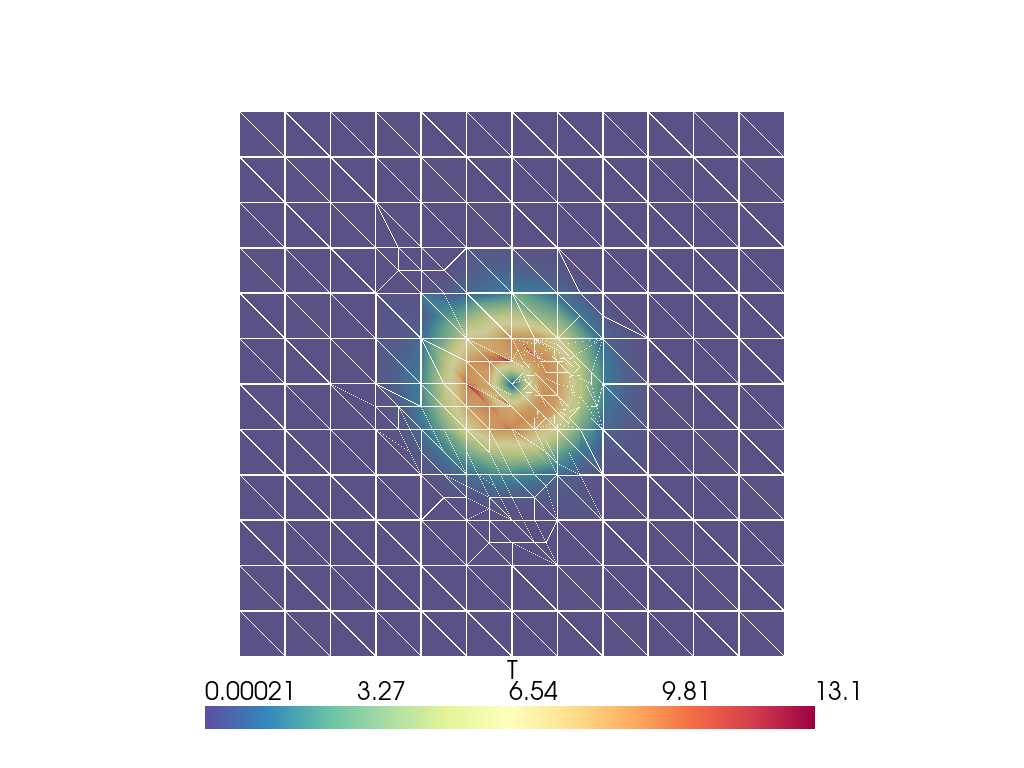

plotting results for Gradient
Current resolution: [1024, 768]


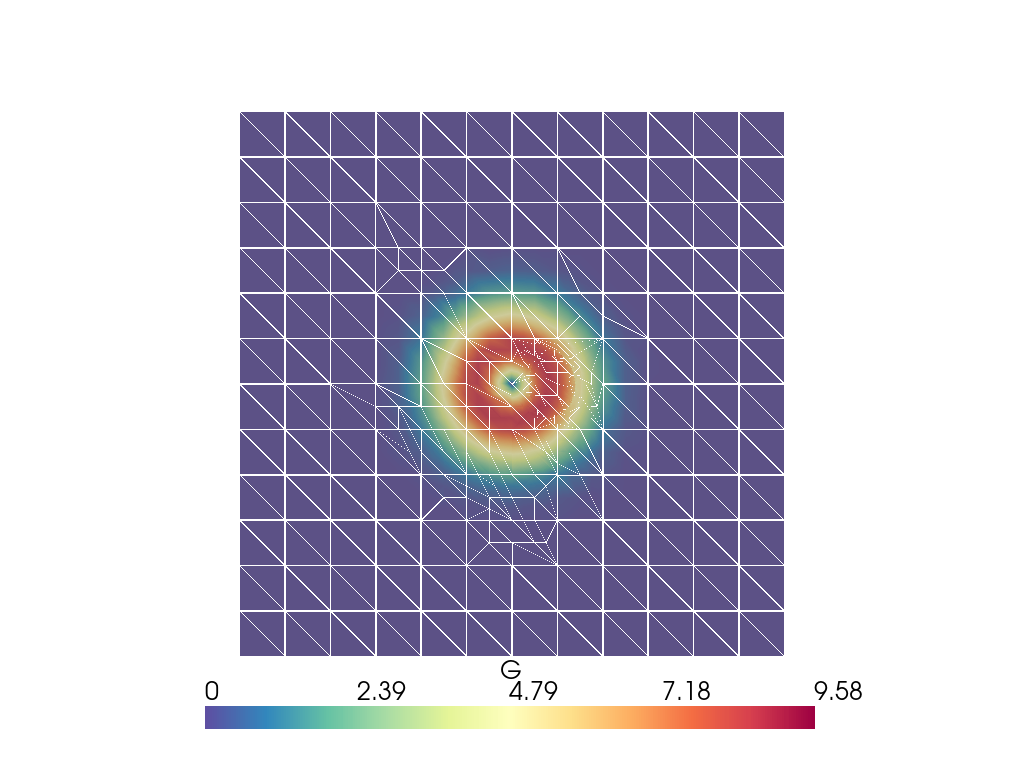

plotting results for Flux (result scale)
Current resolution: [1024, 768]


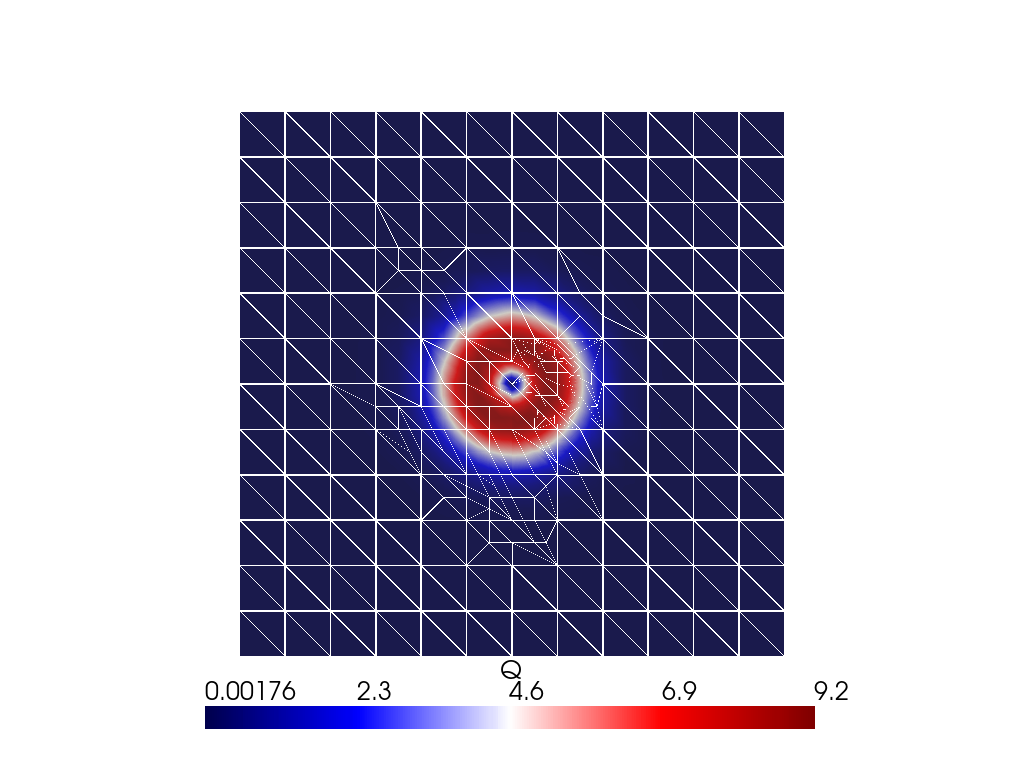

plotting results for Flux (dataset scale)
Current resolution: [1024, 768]


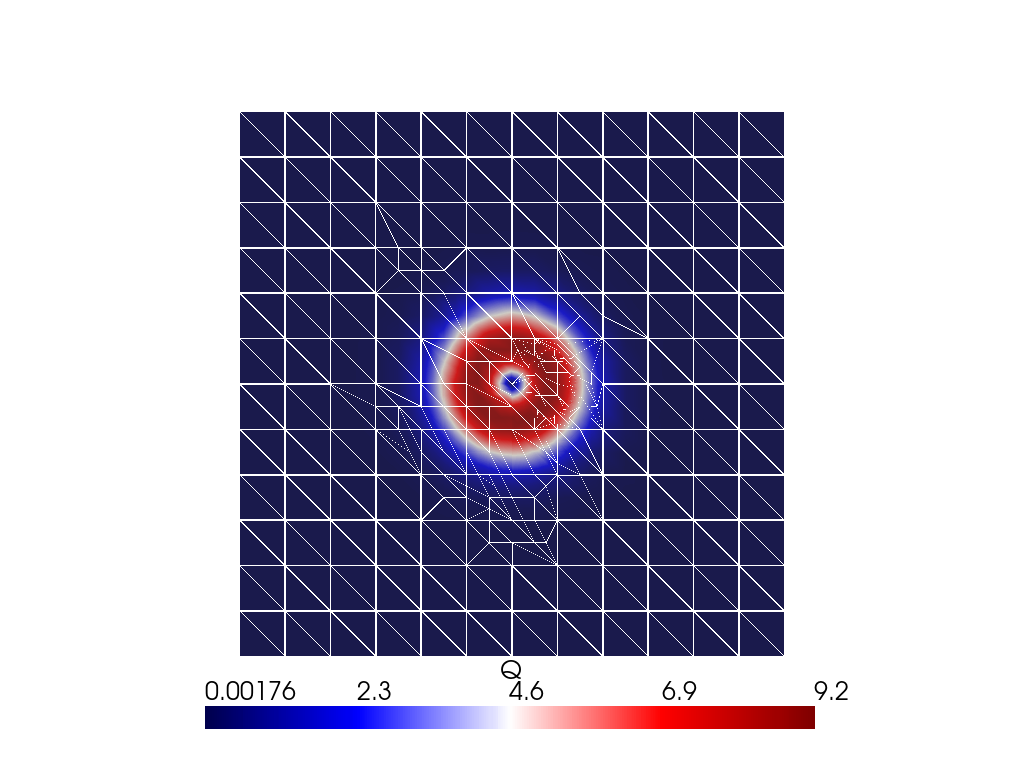

DD_DISTANCE_AVE
Current resolution: [1024, 768]


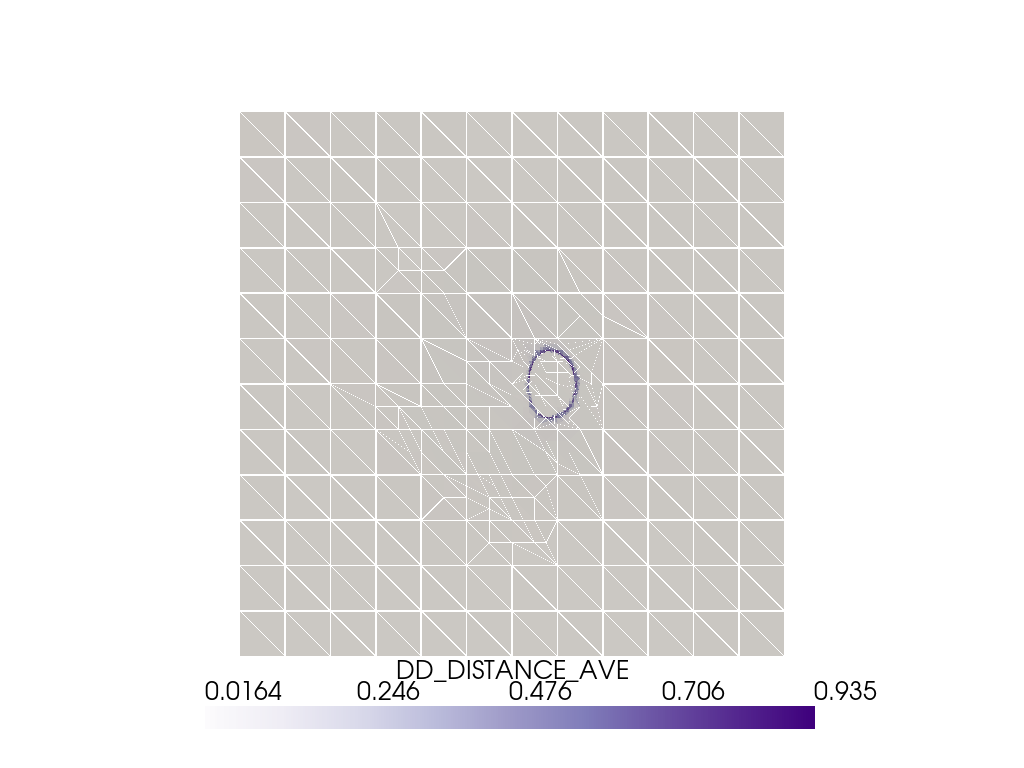

DD_DISTANCE_VAR
Current resolution: [1024, 768]


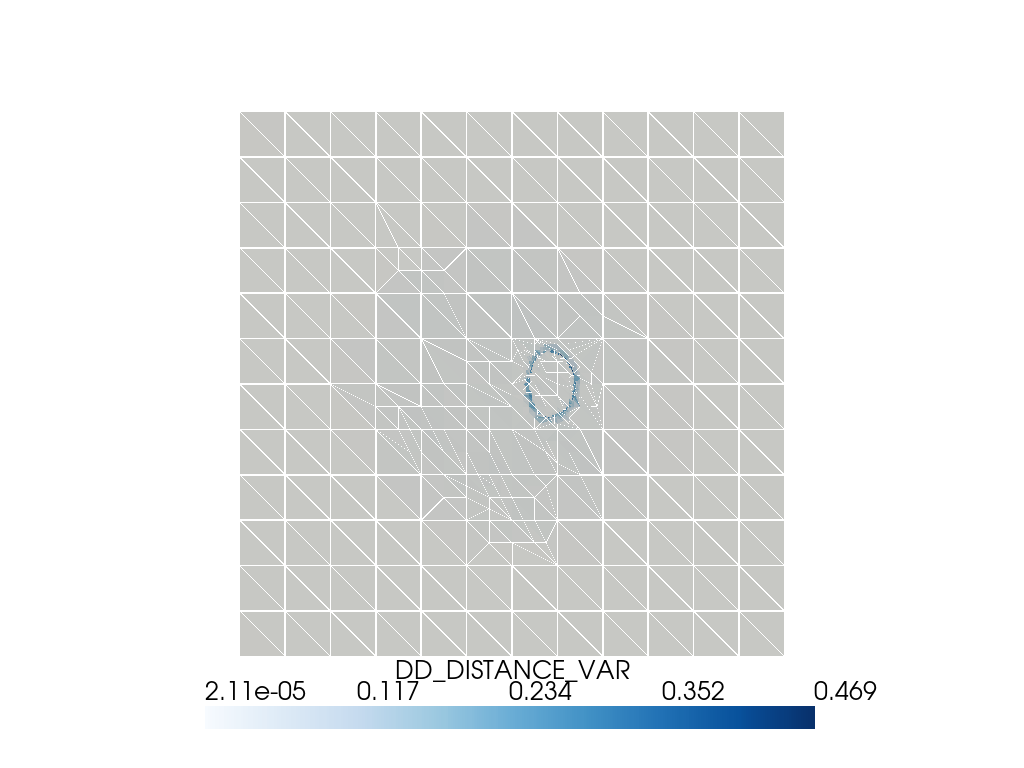

plotting results for Point_distance
Current resolution: [1024, 768]


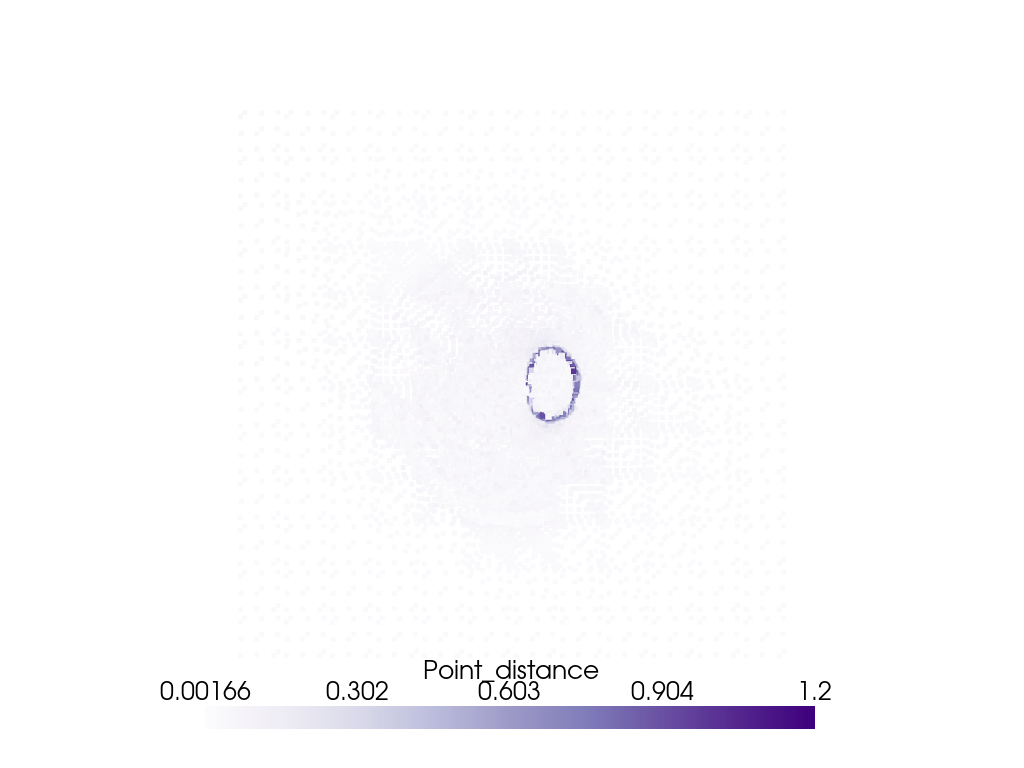

Q - Q_STAR (dataset scale)
Current resolution: [1024, 768]


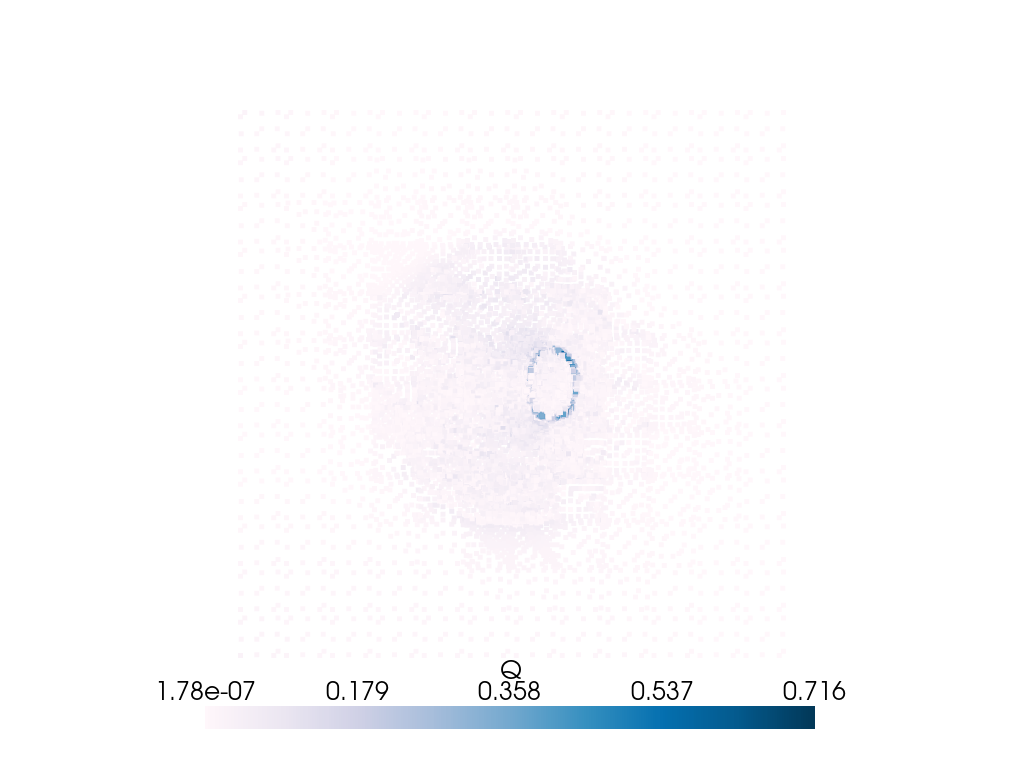

Q - Q_STAR (result scale)


Current resolution: [1024, 768]


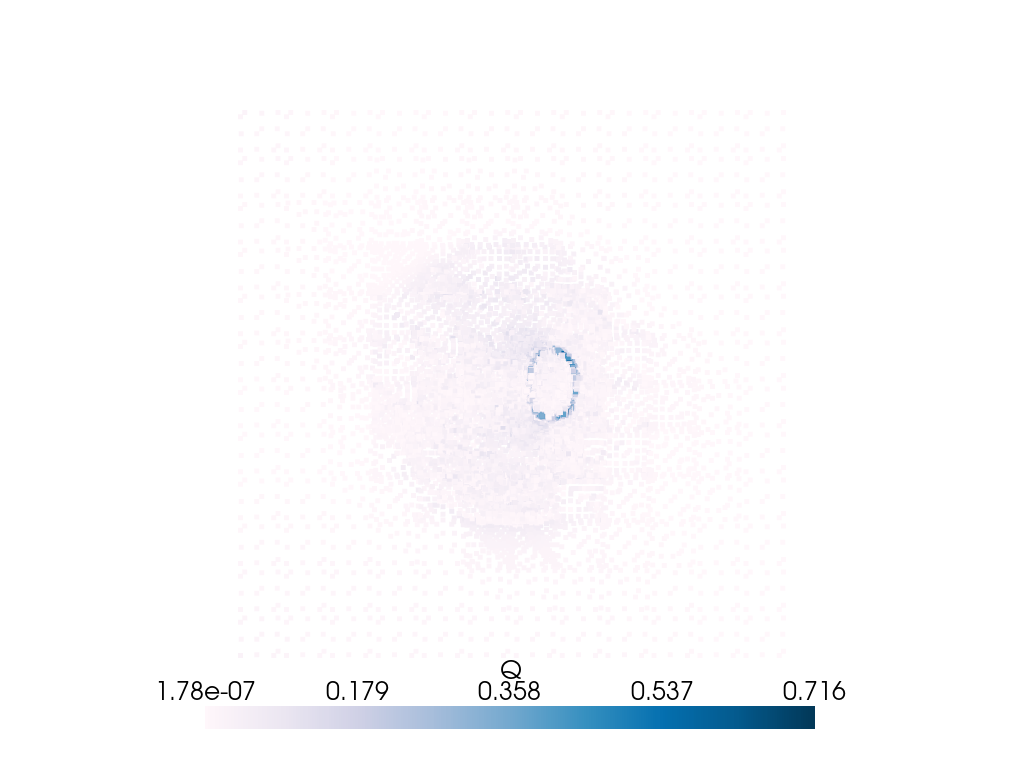

GRAD(P) - GRAD(P)_STAR
Current resolution: [1024, 768]


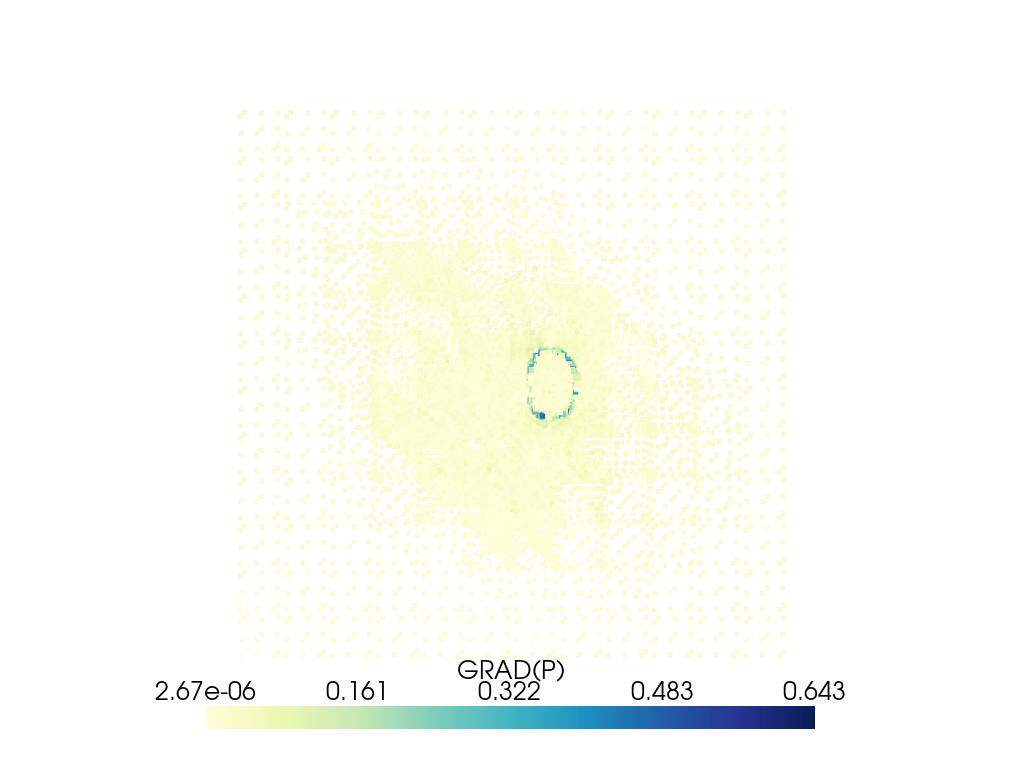

T - P_STAR (dataset scale)
Field 'P_STAR' not found in point data.
T - P_STAR (result scale)
Field 'P_STAR' not found in point data.


In [17]:
# import settings and functions
%run ./../NL_data_tests/plot_for_DD.ipynb

In [13]:
%run ./../../create_gif.ipynb

In [ ]:
if run_test:
    params.show_file = "out_error"
    params.show_field = "ERROR_H1_SEMINORM"
    params.show_edges = True
    params.p_cmap = "rainbow"
    params.p_cmap = "jet"
    params.gif_name = "c5_hat_gif_h1_seminorm"
    # params.p_save = "run_test_err_ind_grad.pdf"
    print("0")
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_ESTIMATOR"
    params.show_edges = True
    params.p_cmap = "jet"
    # params.p_save = "c5_err_est.pdf"
    params.gif_name = "c5_hat_gif_err_est"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_ind_grad"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_DIV"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_ind_div"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "JUMP_L2"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_jump"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "DD_DISTANCE_AVE"
    params.show_edges = True
    params.p_cmap = 'Purples'
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_dist_ave"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "DD_DISTANCE_VAR"
    params.p_cmap = "Blues"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_dist_var"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.p_cmap = "rainbow"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_order"
    create_gif_from_vtk(params)

    params.field_part = -1
    params.show_file = "out_ite"
    params.show_file = "out_resu*refi"
    params.show_field = "T"
    params.show_edges = True
    params.p_cmap = color_temperature
    params.gif_name = "c5_hat_gif_T"
    create_gif_from_vtk(params)

## Comparison between standard and mixed

In [ ]:
if run_analysis:    
    for i in range(len(ana_compare_name)):
        !rm {ana_compare_sum[i]}
        !rm ./out_*
        for elem_size in elem_size_list:
            params.element_size = elem_size
            params.show_mesh = False
            generate_mesh(params)
            params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
            !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
            for order in order_list:
                params.order = order
                !mpirun -np {params.nproc} {ana_compare_exe[i]} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} {jumps} {use_line}
        !mv {ana_compare_sum[i]} {ana_compare_name[i]}.csv
    
!rm out_*h5m

In [16]:
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_ref_ord_name = "ana_square_mexi_mixed_order"

refinement_style = 1
ref_iter_num = 6
ref_control = 1.0
params.nproc = 1

if run_refinement_analysis:    
    !rm {sumanalys}
    !rm ./out_*
    elem_size =  elem_size_list[0]
    params.element_size = elem_size
    params.show_mesh = True
    generate_mesh(params)
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    order = order_list[0]
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line}
    !mv {sumanalys} {ana_ref_ord_name}.csv

In [ ]:
out_to_vtk = !ls -c1 out_error_*h5m

!convert.py {out_to_vtk[0]}

if run_refinement_analysis:
    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.show_edges = True
    params.p_cmap = "rainbow"
    params.p_save = "c5_hat_ord_ref_weak_DD.pdf"
    show_results(params)
    params.p_save = ""

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [18]:
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_ref_ord_name_ori = "ana_square_mexi_mixed_order_ori"

refinement_style = 1
# ref_iter_num = 7
# ref_control = 1.0
params.nproc = 1

if run_refinement_analysis:    
    !rm {sumanalys}
    !rm ./out_*
    elem_size =  elem_size_list[0]
    params.element_size = elem_size
    params.show_mesh = True
    generate_mesh(params)
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    order = order_list[0]
    params.order = order
    !mpirun -np {params.nproc} {hdiv_diffusion} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line}
    !mv {sumanalys} {ana_ref_ord_name_ori}.csv

In [ ]:
out_to_vtk = !ls -c1 out_error_*h5m

!convert.py {out_to_vtk[0]}

if run_refinement_analysis:
    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.show_edges = True
    params.p_cmap = "rainbow"
    # params.p_save = "run_test_err_ind_grad.pdf"
    params.p_save = "c5_hat_ord_ref_mixed.pdf"
    show_results(params)
    params.p_save = ""

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [20]:
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_ref_mesh_name = "ana_square_mexi_mixed_mesh"

if run_refinement_mesh_analysis:   
    refinement_style = 2
    # ref_iter_num = 5
    # ref_control = 1.0
    params.nproc = 1

    !rm {sumanalys}
    !rm ./out_*
    elem_size =  elem_size_list[0]
    params.element_size = elem_size
    params.show_mesh = True
    generate_mesh(params)
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    order = order_list[0]
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line}
    !mv {sumanalys} {ana_ref_mesh_name}.csv

In [ ]:
out_to_vtk = !ls -c1 out_error_*h5m

!convert.py {out_to_vtk[0]}

if run_refinement_mesh_analysis:
    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [22]:

ana_ref_hp_name = "ana_square_mexi_mixed_hp"

if run_refinement_hp_analysis:   
    refinement_style = 3
    # ref_iter_num = 7
    # ref_control = 1.0
    params.nproc = 1

    !rm {sumanalys}
    !rm ./out_*
    elem_size =  elem_size_list[0]
    order = order_list[0]

    params.element_size = elem_size
    params.show_mesh = True
    generate_mesh(params)
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line}
    !mv {sumanalys} {ana_ref_hp_name}.csv

In [ ]:
!convert.py out*

if run_refinement_hp_analysis:
    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.show_edges = True
    # params.p_cmap = "rainbow"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [24]:
if run_refinement_hp_analysis:
    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    # params.p_cmap = "jet"
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

In [25]:
if run_refinement_hp_analysis:
    params.show_file = "out_result"
    params.show_field = "T"
    params.show_edges = True
    # params.p_save = "run_test_err_ind_grad.pdf"
    show_results(params)

### refinement with DD requirements as well

In [26]:
# exe = hdiv_diffusion
sumanalys = "sumanalys.csv"
ana_ref_ord_name_DD = "ana_square_mexi_mixed_DD_order"

refinement_style = 1
# ref_iter_num = 7
# ref_control = 1.0
params.nproc = 1

if run_refinement_analysis_DD_order:    
    !rm {sumanalys}
    !rm ./out_*
    elem_size =  elem_size_list[0]
    params.element_size = elem_size
    params.show_mesh = True
    generate_mesh(params)
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    order = order_list[0]
    params.order = order

    tol_dist = "-tol_distance_ref 4.0 -tol_distance_var_ref 0.5 -refine_h_boundary_only -tol_distance_var_ave 0.5"

    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line} {tol_dist}
    !mv {sumanalys} {ana_ref_ord_name_DD}.csv

In [27]:

ana_ref_DD_hp_name = "ana_square_mexi_mixed_DD_hp"

if run_refinement_DD_hp_analysis:   
    refinement_style = 3
    # ref_iter_num = 2
    # ref_control = 3.0
    params.nproc = 1

    !rm {sumanalys}
    !rm ./out_*
    elem_size =  elem_size_list[0]
    order = order_list[0]

    # tolerance for distance for order ref
    # tol_dist = "-tol_distance_ref 4.0 -tol_distance_var_ref 2.0 -refine_h_boundary_only -tol_distance_var_ave 2.0"
    tol_dist = "-tol_distance_ref 4.0 -tol_distance_var_ref 0.5 -refine_h_boundary_only -tol_distance_var_ave 0.5"
    # tol_dist = "-tol_distance_ref 4.0 -tol_distance_var_ref 0.5 -refine_h_boundary_only -tol_distance_var_ave 0.5 -refine_mesh_every_nt_time 2"
    # tol_dist = "-refine_mesh_every_nt_time 2"
    # tol_dist = ""

    params.element_size = elem_size
    params.show_mesh = True
    generate_mesh(params)
    params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
    !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
    
    params.order = order
    !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line} {tol_dist}
    !mv {sumanalys} {ana_ref_DD_hp_name}.csv



In [28]:
# !mbconvert out_moab_5.h5m out_moab_5.vtk

In [ ]:
get_gifs = True
if get_gifs:
    !convert.py out*

if get_gifs and run_refinement_DD_hp_analysis:

    params.show_file = "out_error"
    params.show_field = "ERROR_H1_SEMINORM"
    params.show_edges = True
    params.p_cmap = "rainbow"
    params.p_cmap = "jet"
    params.gif_name = "c5_hat_gif_h1_seminorm"
    # params.p_save = "run_test_err_ind_grad.pdf"
    print("0")
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_ESTIMATOR"
    params.show_edges = True
    params.p_cmap = "jet"
    # params.p_save = "c5_err_est.pdf"
    params.gif_name = "c5_hat_gif_err_est"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_GRAD"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_ind_grad"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ERROR_INDICATOR_DIV"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_ind_div"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "JUMP_L2"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_err_jump"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "DD_DISTANCE_AVE"
    params.show_edges = True
    params.p_cmap = 'Purples'
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_dist_ave"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "DD_DISTANCE_VAR"
    params.p_cmap = "Blues"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_dist_var"
    create_gif_from_vtk(params)

    params.show_file = "out_error"
    params.show_field = "ORDER"
    params.p_cmap = "rainbow"
    params.show_edges = True
    params.warp_field_scalar = ""
    params.gif_name = "c5_hat_gif_order"
    create_gif_from_vtk(params)

    params.field_part = -1
    params.show_file = "out_ite"
    params.show_file = "out_resu*refi"
    params.show_field = "T"
    params.show_edges = True
    params.p_cmap = color_temperature
    params.gif_name = "c5_hat_gif_T"
    create_gif_from_vtk(params)

    params.field_part = -1
    params.show_file = "out_ite"
    params.show_file = "out_resu*refi"
    params.show_field = "Q"
    params.show_edges = True
    params.p_cmap = color_flux
    params.gif_name = "c5_hat_gif_Q"
    create_gif_from_vtk(params)

## Monte analysis

In [30]:
# Testing running analysis
if run_monte:
    !rm sumanalys_monte.csv

    # refinement_style = 1
    ref_iter_num = 6
    ref_control = 1.0
    params.nproc = 1
    

    # tolerance for distance for order ref
    # tol_dist = "-tol_distance_ref 4.0 -tol_distance_var_ref 2.0 -refine_h_boundary_only -tol_distance_var_ave 1.0" 
    tol_dist = ""

    print_integ = ""

    monte = "-monte_carlo 30"

    for i in range(len(monte_name_list)):
        # skip the first one
        if i < 3:
            continue

        # run only second one
        # if i != 3:
        #     continue

        elem_size = elem_size_list[monte_ele_list[i]]
        params.element_size = elem_size
        params.show_mesh = True
        generate_mesh(params)
        params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
        !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
        order = order_list[monte_ele_list[i]]
        params.order = order
        print(monte_ref_list[i])
        !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line} {print_integ} {tol_dist} {monte_ref_list[i]} {monte}
        !mv sumanalys_monte.csv {monte_name_list[i]}.csv

        print("done "+str(i))



#     # refinement_style = 0

#     # if run_refinement_analysis:    
#     !rm {sumanalys}
#     !rm ./out_*
#     elem_size =  elem_size_list[0]
#     params.element_size = elem_size
#     params.show_mesh = True
#     generate_mesh(params)
#     params.part_file = params.mesh_file + "_" + str(params.nproc) + "p.h5m"
#     !{mofem_part} -my_file {params.mesh_file + ".h5m"} -my_nparts {params.nproc} -output_file {params.part_file} -dim 2 -adj_dim 1
#     order = order_list[0]
#     params.order = order
#     !mpirun -np {params.nproc} {exe} -file_name {params.part_file} -my_order {params.order} {analytical_solution_tag} -refinement_style {refinement_style} -ref_iter_num {ref_iter_num} -ref_control {ref_control} {jumps} {use_line} {print_integ} {tol_dist} {monte}

#     !mv sumanalys_monte.csv {monte_name}.csv
    
#     !convert.py out*

# # -print_integ
#     # !convert.py out*


In [ ]:
!mbconvert out_result_refined_3.h5m out_result_refined_3.vtk

### Load analysis

In [ ]:
print(naming)

In [33]:
error_name_list = []
error_label_list = []

error_name_list.append("L2norm")
error_label_list.append(r'Global error $L^2$-norm')
error_name_list.append("H1seminorm")
error_label_list.append(r'Global error $H^1$-seminorm')
error_name_list.append("fluxErr")
error_label_list.append(r'Global Flux error')

error_name_list.append("errorIndicatorGrad")
error_label_list.append(r'Global error indicator grad')
error_name_list.append("errorIndicatorDiv")
error_label_list.append(r'Global error indicator div')


if jumps:
    error_name_list.append("jumpL2")
    error_label_list.append(r'Global jump L2')
    # error_name_list.append("jumpHdiv")
    # error_label_list.append(r'Global jump Hdiv')

error_name_list.append("totalErr")
error_label_list.append(r'Total error')

error_name_list.append("errorEstimator")
error_label_list.append(r'Global error estimator')

In [ ]:
%run ./../../imports.ipynb

In [35]:
filename_prefix = "c5_mixed_hat_"

mixed_DD_ana = Analysis(ana_compare_name[0], naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='*', linestyle='--', plot_gradients=True, label="Weaker DD")
mixed_ana = Analysis(ana_compare_name[1], naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='x', linestyle=':', plot_gradients=False, label="Mixed")
classic_ana = Analysis(ana_compare_name[2], naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='o', linestyle=':', plot_gradients=False, label="Standard")
classic_DD_ana = Analysis(ana_compare_name[3], naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='v', linestyle=':', plot_gradients=False, label="Stronger DD")

order_ref_ana = Analysis(ana_ref_ord_name, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='*', linestyle='--', plot_gradients=False, label=r"Weaker DD; Adaptive $p$-refinement", color = 'black')
order_ref_ana_ori = Analysis(ana_ref_ord_name_ori, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='x', linestyle=':', plot_gradients=False, label=r"Mixed; Adaptive $p$-refinement")

order_DD_ana = Analysis(ana_ref_ord_name_DD, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='v', linestyle=':', plot_gradients=False, label=r"Weaker DD; Adaptive $p$-refinement DD", color = 'red')

hp_DD_ana = Analysis(ana_ref_DD_hp_name, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='*', linestyle='--', plot_gradients=False, label=r"Weaker DD; Adaptive $hp$-refinement", color = 'red')

mesh_ref_ana = Analysis(ana_ref_mesh_name, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='v', linestyle=':', plot_gradients=False, label=r"Adaptive $h$-refinement", color = 'black')


# hp_ref_ana = Analysis(ana_ref_hp_name, naming, order_list, error_name_list, error_label_list, filename_prefix, elem_size_list,  marker='*', linestyle=':', plot_gradients=False, label="Adaptive $hp$-refinement", color = 'red')

# ana_ref_ord_name

In [ ]:
print(mixed_DD_ana.data)

In [37]:
# add total error norm and error estimators to the plots



# error_name_list.append("total_error_norm")
# error_label_list.append(r'Combined error norm')

### Plot results

In [38]:
# # mixed_ana.plot_both_analyses_by_elem_size([classic_ana])
# mixed_DD_ana.plot_both_analyses_by_elem_size([])
# # mixed_ana.plot_both_analyses_by_gaussnum([classic_ana], [order_ref_ana, mesh_ref_ana])
# mixed_DD_ana.plot_both_analyses_by_gaussnum([])

In [ ]:
monte_data_list = []
for i in range(len(monte_name_list)):
    monte_name = monte_name_list[i]
    monte_data_list.append(pd.read_csv(f'{monte_name}.csv', header=None, names=naming,  index_col=False))
    monte_data_list[i]['totalErr'] = monte_data_list[i]['L2norm'] + monte_data_list[i]['H1seminorm'] + monte_data_list[i]['fluxErr']
print(monte_data_list)

In [ ]:
mixed_DD_ana.plot_gradients = False
mixed_DD_ana.legend_fond_size = 12

# mixed_DD_ana.filename_prefix = "c5_mixed_hat_mixed_DD_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([classic_DD_ana])
# mixed_DD_ana.plot_both_analyses_by_elem_size([classic_DD_ana])


mixed_DD_ana.filename_prefix = "c5_mixed_hat_dataset_ref_order_"
mixed_DD_ana.plot_both_analyses_by_gaussnum([classic_DD_ana], [order_ref_ana])

# %run ./../../imports.ipynb

# mixed_DD_ana.filename_prefix = "c5_mixed_hat_dataset_ref_DD_hp_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([classic_DD_ana], [order_ref_ana, mesh_ref_ana, hp_DD_ana, order_DD_ana])


# mixed_DD_ana.filename_prefix = "c5_mixed_hat_dataset_ref_DD_hp_monte_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([], [order_ref_ana, mesh_ref_ana, hp_DD_ana, order_DD_ana], monte_data_list)

# mixed_DD_ana.filename_prefix = "c5_mixed_hat_dataset_ref_ord_monte_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([], [order_ref_ana, hp_DD_ana, order_DD_ana], monte_data_list)

# mixed_DD_ana.filename_prefix = "c5_mixed_hat_mixed_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([mixed_ana])
# mixed_DD_ana.plot_both_analyses_by_elem_size([mixed_ana])

# mixed_DD_ana.filename_prefix = "c5_mixed_hat_DD_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([classic_DD_ana])
# mixed_DD_ana.plot_both_analyses_by_elem_size([classic_DD_ana])


# mixed_DD_ana.filename_prefix = "c5_mixed_hat_ref_order_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([], [order_ref_ana])
# mixed_DD_ana.filename_prefix = "c5_mixed_hat_ref_mesh_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([], [mesh_ref_ana])
# mixed_DD_ana.filename_prefix = "c5_mixed_hat_ref_order_mesh_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([], [order_ref_ana, mesh_ref_ana])

# mixed_DD_ana.filename_prefix = "c5_mixed_hat_ref_hp_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([], [order_ref_ana, mesh_ref_ana, hp_ref_ana])

In [41]:

# mixed_DD_ana.legend_fond_size = 12
# # mixed_ana.plot_gradients = True
# mixed_DD_ana.filename_prefix = "c5_mixed_hat_compare_"
# mixed_DD_ana.plot_both_analyses_by_gaussnum([classic_DD_ana], [order_ref_ana])

In [ ]:
!mbconvert out_monte_ele_errors_29.h5m out_monte_ele_errors_29.vtk